# **Analyzing Hotel Bookings**
### **Context**

In this dataset, we will be able to analyze different types of bookings such as:
* Type of hotel
* Duration of stay
* Types of visitors
* Types of booking


### **Understanding the column data**
- **Hotel**
  * H1: Resort hotel
  * H2: City hotel
- **is_canceled**
  * 0: Not canceled
  * 1: Canceled
- **lead_time**: Amount of days that have elapsed between date of booking and arrival date.
- **arrival_date_year**: Year of arrival date (2015 - 2017)
- **arrival_date_week_number**: Week of year (1 - 53) for arrvial date
- **arrival_date_month**: Month of arrival date (Jan - Dec)
- **arrival_date_day_of_month**: Arrival date
- **stays_in_weekend_nights**: Amount of weekend nights (Sat & Sun) the guest stayed or booked to stay at the hotel
- **stays_in_week_nights**: Amount of week nights (Mon - Fri) the guest stayed or booked to stay at the hotel
- **Adults**
- **Children**
- **Babies**
- **meal**: Type of meal booked.
  * Undefined (SC): no meal package
  * Bed & Breakfast (BB)
  * Half board (HB): Breakfast and one other meal
  * Full board (FB): Breakfast, lunch, and dinner
- **country**
- **market_segment**: a group of people who share one or more common characteristics, lumped together for marketing purposes
- **distribution_channel**: a chain of businesses or intermediaries through which a good or service passes until it reaches the final buyer or the end consumer
  * Travel agents (TA)
  * Tour operators (TO)
- **is_repeated_guest**: value indication if the booking name was from a repeat guest
  * 1: Yes
  * 0: No
- **previous_cancellations**: Amount of previous bookings that were cancelled by the customer prior to the current booking 
- **previous_bookings_not_cancelled**: Amount of previous bookings that were not cancelled by the customer prior to the current booking 
- **reserved_room_type**: Code of room type reserved. Code is presented instead of designation for anonymity. 
- **assigned_room_type**: Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (overbooking) or by customer request. Code is presented instead of designation for anonymity.
- **booking_changes**: amount of changes / amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation
- **deposit_type**: indicates whether the customer made a deposit to guarantee the booking. This vaiable can assume three categories:
  * No deposit
  * Non-Refundable: a deposit was made in the value of the total stay cost
  * Refundable: a deposit was made with a value under the total cost of stay
- **agent**: ID of the travel agency that made the booking
- **company**: ID of the company / entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity.
- **day_in_waiting_list**: number of days the booking was in the waiting list before it was confirmed to the customer
- **customer_type**
  * Contract: when the booking has a contract associated to it
  * Group: when the booking is associated to a group
  * Transient: when the booking is not part of a group or contract and is not associated to other transient booking.
  * Transient-party: when the booking is transient, but is associated to at least other transient booking.
- **adr (average daily rate)**
   * average daily rate = $ \frac{Sum Of All Lodging Transaction}{Total Number Of Staying Night}$
- **required_car_parking_spaces**: amount of car parking spaces required by the customer 
- **total_of_special_requests**: amount of special requests made by the customer (e.g. twin bed or high floor)
- **reservation_status**
 * Canceled: booking was canceled by the customer
 * Check-Out: customer has checked in but already departed 
 * No-Show: customer did not check-in and did inform the hotel of the reason why
- **reservation_status_date**: Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel.

### **Objective**
1. Create an indepth analysis to figure out the standard patterns of booking.
2. Generate a report to be used to derive a strategy for a marketing team.


## **Code**

In [1]:
# Import required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
df = pd.read_csv('/content/drive/My Drive/datasets/hotel_bookings.csv')

In [4]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [5]:
df.shape

(119390, 32)

In [6]:
# Determine how many NaN or Null values are present in the dataset.
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

It looks like this datasets contains a lot of NaN values in **company** and **agent.** I will drops these columns altogether. 

In [0]:
# Dropping the agent and company columns.
df = df.drop(columns=['agent', 'company'])

In [8]:
# Removing the 488 rows with NaN values.
df = df.dropna(axis=0)

# Double check the values.
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

## **Visualizing**

([<matplotlib.patches.Wedge at 0x7fd4dce7beb8>,
 [Text(-0.9520945954321745, -0.5509227544300964, 'City Hotel'),
  Text(1.0386485932920646, 0.6010067384417713, 'Resort Hotel')],
 [Text(-0.519324324781186, -0.30050332059823437, '66.7%'),
  Text(0.6058783460870376, 0.35058726409103325, '33.3%')])

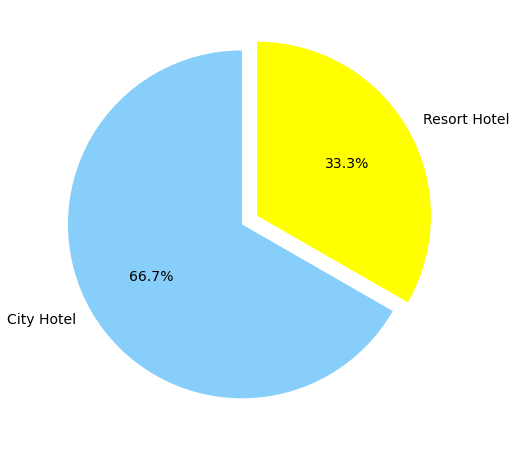

In [9]:
# Enlarge the pie chart.
plt.rcParams['figure.figsize'] = 8, 8

# Indexing labels. 
labels = df['hotel'].value_counts().index.tolist()

# Convert value counts.
sizes = df['hotel'].value_counts().tolist()

# Separating the sections for visibility.
explode = (0, 0.1)

# Color the pie chart.
colors = ['lightskyblue', 'yellow']

# Plot the pie chart. 
plt.pie(sizes, explode=explode, labels=labels, colors=colors, \
        autopct='%1.1f%%',startangle=90, textprops={'fontsize': 14})

In [10]:
df['adults'].groupby(df['hotel']).describe()

,count,mean,std,min,25%,50%,75%,max
hotel,,,,,,,,
City Hotel,79302.0,1.851126,0.509013,0.0,2.0,2.0,2.0,4.0
Resort Hotel,39596.0,1.872942,0.697112,0.0,2.0,2.0,2.0,55.0


In [11]:
df['children'].groupby(df['hotel']).describe()

,count,mean,std,min,25%,50%,75%,max
hotel,,,,,,,,
City Hotel,79302.0,0.091397,0.372230,0.0,0.0,0.0,0.0,3.0
Resort Hotel,39596.0,0.129862,0.447192,0.0,0.0,0.0,0.0,10.0


It appears that the mean values for adults and children are higher. 

Resort hotels are the better choice for large families.

### **Overall Canceled Bookings**

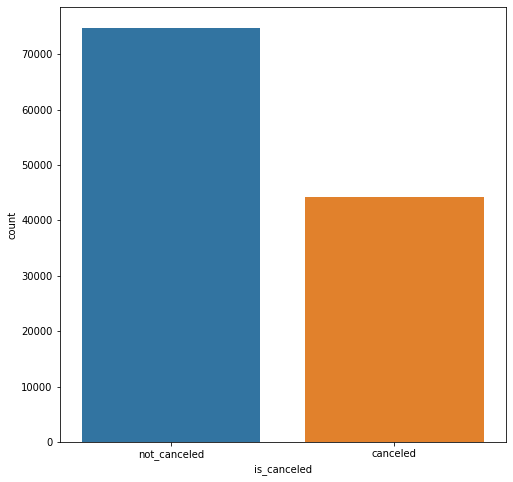

In [12]:
df['is_canceled'] = df.is_canceled.replace([1, 0], ['canceled', 'not_canceled'])
canceled_data = df['is_canceled']
sns.countplot(canceled_data)

It appears that the majority of the bookings were not canceled.

### **Hotel Cancellation Rate**

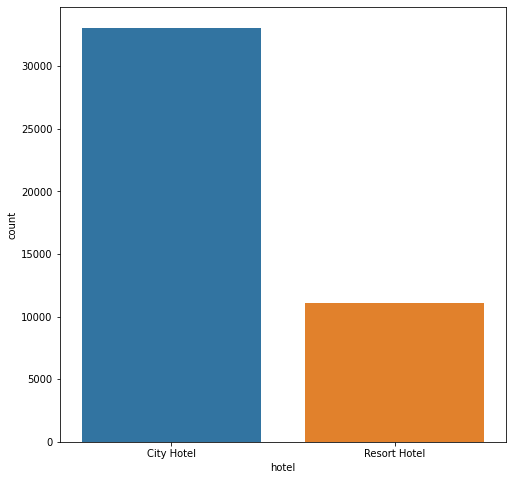

In [13]:
lst1 = ['is_canceled', 'hotel']
type_of_hotel_canceled = df[lst1]
canceled_hotel = type_of_hotel_canceled[type_of_hotel_canceled['is_canceled'] == 'canceled'].groupby(['hotel']).size().reset_index(name = 'count')
sns.barplot(data = canceled_hotel, x = 'hotel', y = 'count')

It appears that a large proportion of cancellations is from City Hotel.

### **Overview of Arrival Period**

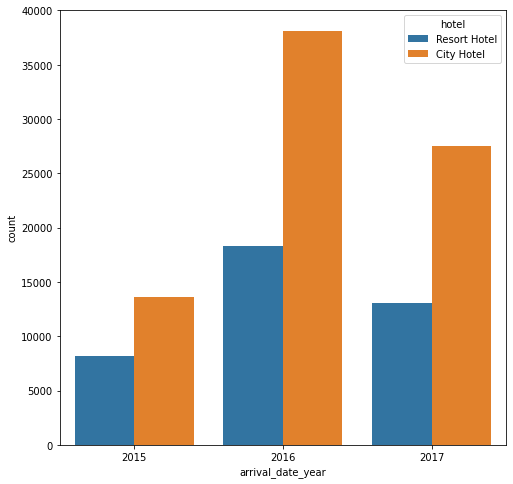

In [14]:
lst3 = ['hotel', 'arrival_date_year', 'arrival_date_month','arrival_date_day_of_month' ]
period_arrival = df[lst3]
sns.countplot(data = period_arrival, x = 'arrival_date_year', hue = 'hotel')

Text(0, 0.5, 'Count')

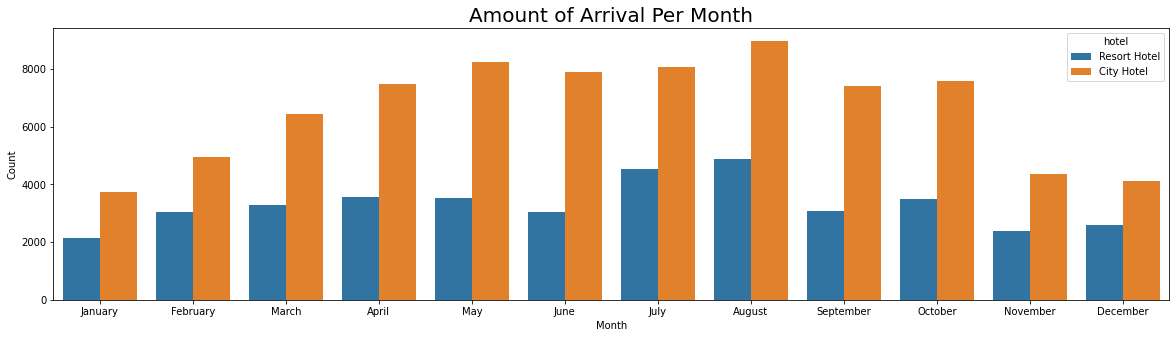

In [15]:
plt.figure(figsize=(20,5))

sns.countplot(data = period_arrival, x = 'arrival_date_month', hue = 'hotel', order = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
          'August', 'September', 'October', 'November', 'December']).set_title('Amount of Arrival Per Month',fontsize=20)
plt.xlabel('Month')
plt.ylabel('Count')

Text(0.5, 1.0, 'Amount of Arrival Per Day')

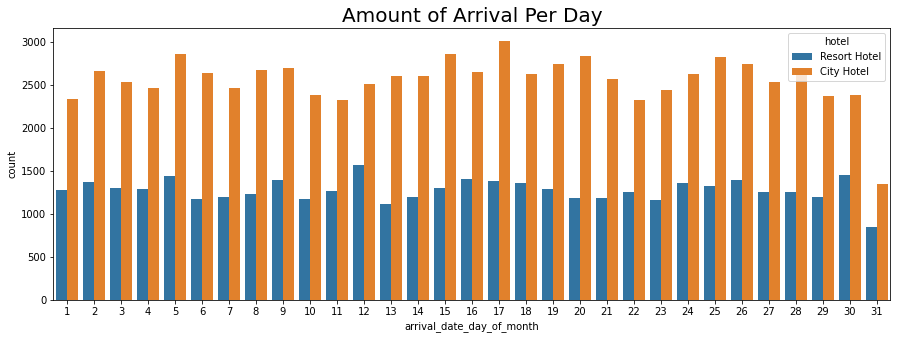

In [16]:
plt.figure(figsize=(15,5))
sns.countplot(data = period_arrival, x = 'arrival_date_day_of_month', hue = 'hotel').set_title('Amount of Arrival Per Day', fontsize = 20)

2016 seems to be the year where hotel booking is at its highest.

It appears there is an increasing trend in booking around the middle of the year, with August being the highest.

It also looks like there is a roller coaster trend for the arrival day of month.
It may be due to people tending to book over the weekends.

### Looking into Weekends

Text(0.5, 1.0, 'Amount of Stays on Weekend Nights')

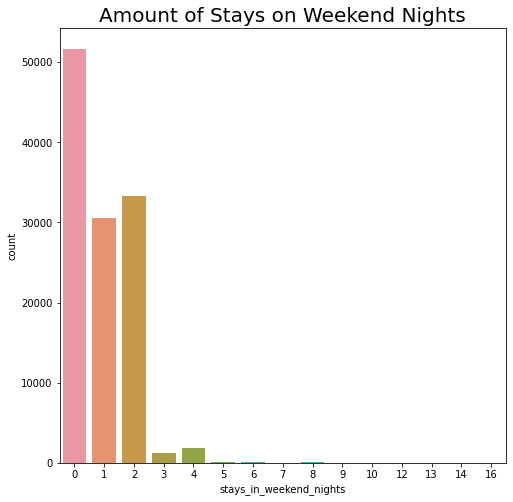

In [17]:
sns.countplot(data = df, x = 'stays_in_weekend_nights').set_title('Amount of Stays on Weekend Nights', fontsize = 20)

Text(0.5, 1.0, 'Amount of Stays on a Weekend Night')

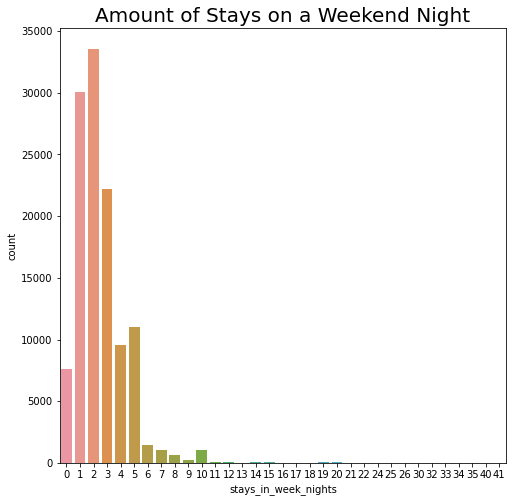

In [18]:
sns.countplot(data = df, x = 'stays_in_week_nights' ).set_title('Amount of Stays on a Weekend Night' , fontsize = 20)

It appears that the majority of the stays are actually on weekdays.

### **Types of Visitors**

Text(0.5, 1.0, 'Number of Adults')

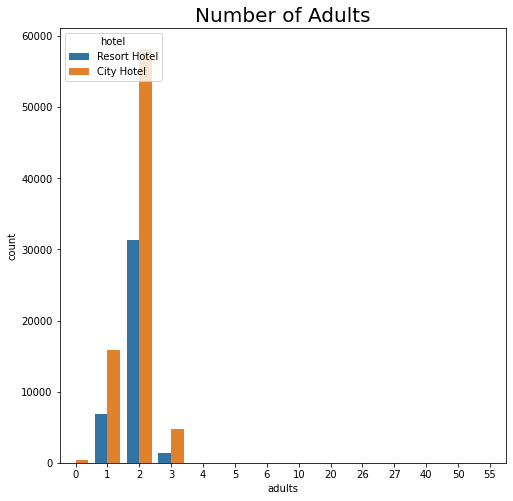

In [19]:
sns.countplot(data = df, x = 'adults', hue = 'hotel').set_title("Number of Adults", fontsize = 20)

Text(0.5, 1.0, 'Number of Children')

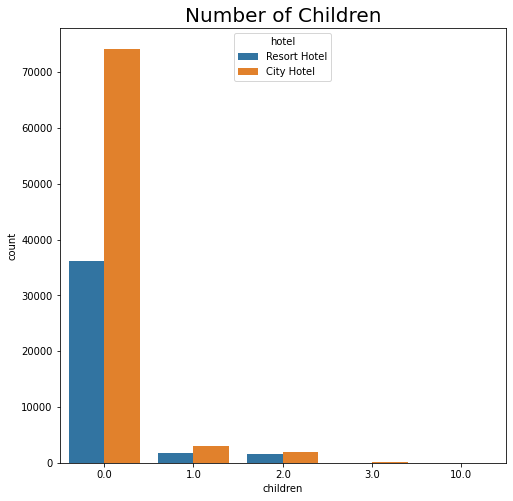

In [20]:
sns.countplot(data = df, x = 'children', hue = 'hotel').set_title("Number of Children", fontsize = 20)

Text(0.5, 1.0, 'Number of Babies')

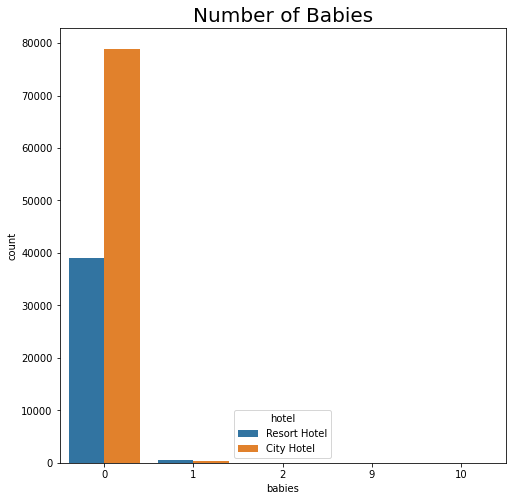

In [21]:
sns.countplot(data = df, x = 'babies', hue = 'hotel').set_title("Number of Babies", fontsize = 20)

It appears the the majority of the visitors travel in pairs. 

Those that travel with children or babies have no specific preference for the type of the hotel.

Those just bringing babies perfer resort hotels.

### **Country Origin**

In [0]:
import plotly.express as px

In [0]:
country_visitors = df[df['is_canceled'] == 'not_canceled'].groupby(['country']).size().reset_index(name = 'count')

In [24]:
px.choropleth(country_visitors,
                    locations = "country",
                    color= "count", 
                    hover_name= "country", # column to add to hover information
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title="Country Origin of Visitors")

It looks like there is a large number of visitors from Western Europe.

A marketing team could be instructed to target people of this region.

### **Market Segments & Distribution Channels**

Text(0.5, 1.0, 'Types of Market Segments')

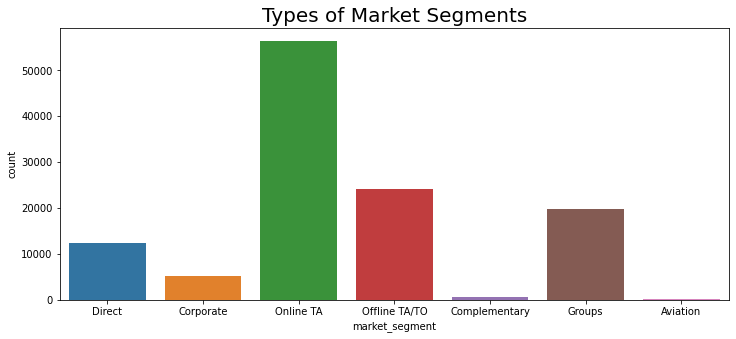

In [25]:
plt.figure(figsize=(12,5))
sns.countplot(data = df, x = 'market_segment').set_title('Types of Market Segments', fontsize = 20)

Text(0.5, 1.0, 'Types of Distribution Channels')

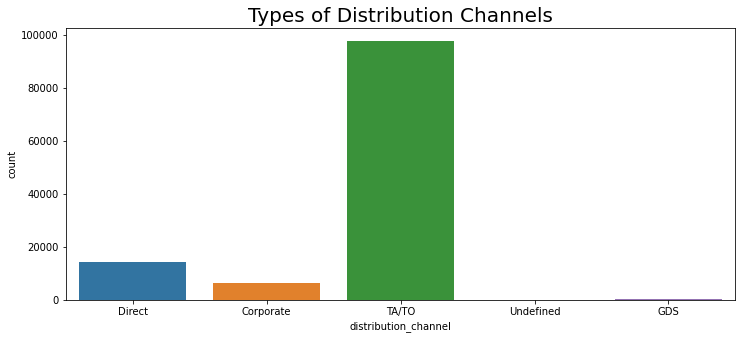

In [26]:
plt.figure(figsize=(12,5))
sns.countplot(data = df, x = 'distribution_channel').set_title('Types of Distribution Channels', fontsize = 20)

The majority of the distribution channels and market segments involve travel agencies (online or offline).

The marketing area can be targeted on the travel agencies' websites.

### **Deposit Types**

Text(0.5, 1.0, 'Deposit Types')

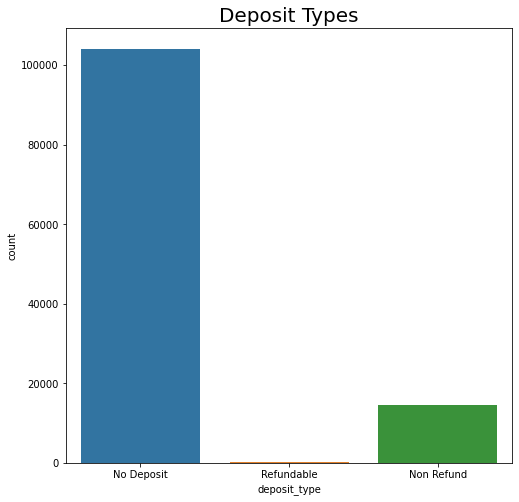

In [27]:
sns.countplot(data = df, x = 'deposit_type').set_title('Deposit Types', fontsize = 20)

The majority of the bookings do not require a deposit. That could explain why cancellation rate was actually 50% of the non-cancellation rate. 

### **Repeated Guests**

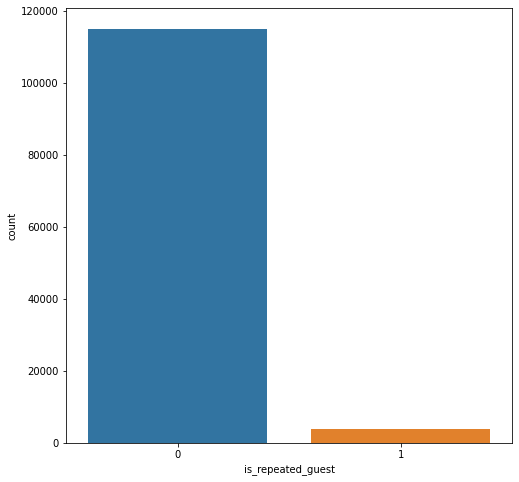

In [28]:
sns.countplot(data = df, x = 'is_repeated_guest')

Very low amount of repeated guests. There would be a need to market to them because they have booked before and may be suaded to book again.

### **Guest Types**

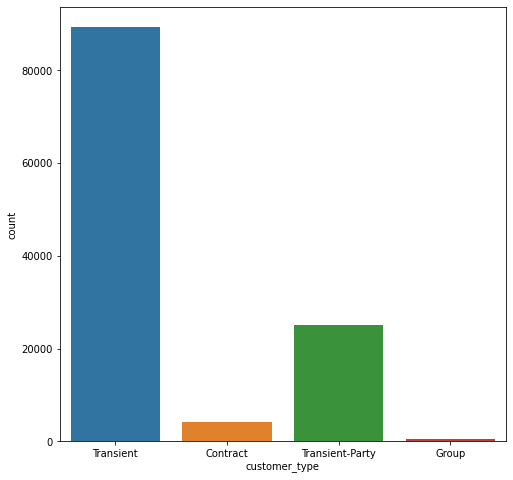

In [29]:
sns.countplot(data = df, x = 'customer_type')

The majority of the bookings are transient. This means that the booking is not part of a group or contract. With the ease of booking directly from the website, most people tend to skip the middleman to ensure quick response from their booking. 

### **Prices Per Month Per Hotel**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



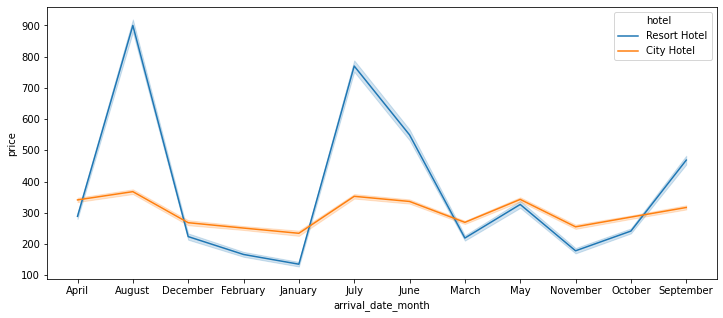

In [38]:
# Resizing plot.
plt.figure(figsize=(12,5))

# Calculating average daily rate per person.
df.loc[:,'adr_pp'] = df.loc[:,'adr'] / (df.loc[:,'adults'] + df.loc[:,'children']) 
actual_guests = df.loc[df["is_canceled"] == 'not_canceled']
actual_guests['price'] = actual_guests.loc[:,'adr'] * (actual_guests.loc[:,'stays_in_weekend_nights'] + actual_guests.loc[:,'stays_in_week_nights'])
sns.lineplot(data = actual_guests, x = 'arrival_date_month', y = 'price', hue = 'hotel')

Prices of the resort hotel are much higher. Prices of the city hotel do not fluctuate too much.

## **Summary**

1. The majority of the hotels booked are from the city hotels. A marketing team would definately need to allocate funds targeting those.
2. The high rate of cancellations with the city hotel could be due to the no deposit policies.
3. Target months would be between May - August as those are during the peak season.
4. The majority of guests are from Western Europe. A marketing team would need to allocate a significant amount of their budget on that area.
5. Given that there are no repeat guests, the team would need to target adverts on guests to increase the return rate.